In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles
import pandas as pd

In [2]:
df_venn = pd.read_table('../data/processed/variant.csv')

/tmp/ipykernel_26176/4050860260.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_venn = pd.read_table('../data/processed/variant.csv')


In [3]:
df_venn = df_venn.drop_duplicates(subset=['HGVSG'])

In [4]:
df_venn

,HGVSG,Merged_Source,Name,ClinicalSignificance,Origin,ReviewStatus,pos_stop_prot,pos_relative_prot,pos_var_cds,nuc_upstream,...,AF_afr,AF_amr,AF_asj,AF_eas,AF_fin,AF_mid,AF_nfe,AF_sas,AF_remaining,overlapping_domain
0,11:g.126275389C>T,ClinVar;COSMIC;gnomAD,NM_017547.4(FOXRED1):c.694C>T (p.Gln232Ter),Pathogenic,germline;unknown,"criteria provided, multiple submitters, no con...",232,0.4774,694,GTC,...,0.00003,0.0,0.0,0.0,0.0,0.0,0.000046,0.000000,0.000017,FAD dependent oxidoreductase
1,11:g.126272975C>T,ClinVar;gnomAD,NM_017547.4(FOXRED1):c.313C>T (p.Gln105Ter),Likely pathogenic,germline,"criteria provided, single submitter",105,0.2160,313,TCA,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,FAD dependent oxidoreductase
2,11:g.126277071C>T,ClinVar;gnomAD,NM_017547.4(FOXRED1):c.1102C>T (p.Gln368Ter),Pathogenic,germline,"criteria provided, multiple submitters, no con...",368,0.7572,1102,GAG,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,FAD dependent oxidoreductase
3,11:g.126276479G>T,ClinVar,NM_017547.4(FOXRED1):c.1057G>T (p.Glu353Ter),Pathogenic,germline,"criteria provided, multiple submitters, no con...",353,0.7263,1057,CGG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FAD dependent oxidoreductase
4,11:g.126273014C>T,ClinVar;gnomAD,NM_017547.4(FOXRED1):c.352C>T (p.Gln118Ter),Pathogenic,paternal,"criteria provided, single submitter",118,0.2428,352,CAG,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,FAD dependent oxidoreductase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637312,Y:g.20760032C>G,gnomAD,NM_001039567.3(RPS4Y2):c.246C>G (p.Tyr82Ter),Uncertain significance,NaN,NaN,82,0.3118,246,ACA,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.000004,0.000000,0.000000,S4 RNA-binding domain profile
637313,Y:g.20768907A>T,gnomAD,NM_001039567.3(RPS4Y2):c.463A>T (p.Lys155Ter),Uncertain significance,NaN,NaN,155,0.5894,463,ATC,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.000004,0.000000,0.000000,NaN
637314,Y:g.20780937A>T,gnomAD,NM_001039567.3(RPS4Y2):c.697A>T (p.Lys233Ter),Uncertain significance,NaN,NaN,233,0.8859,697,AAT,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.000004,0.000000,0.000000,NaN
637315,Y:g.20780973C>T,gnomAD,NM_001039567.3(RPS4Y2):c.733C>T (p.Arg245Ter),Uncertain significance,NaN,NaN,245,0.9316,733,ATC,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.000015,0.000251,0.000000,NaN


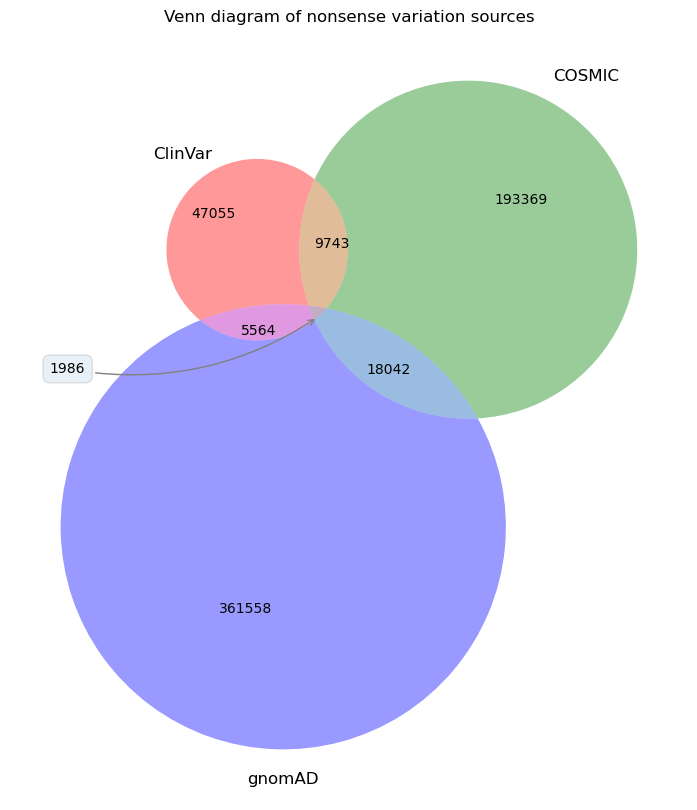

In [5]:
counts = df_venn['Merged_Source'].value_counts()


venn_data = {
    '100': counts.get('ClinVar', 0),  # ClinVar seulement
    '010': counts.get('COSMIC', 0),  # COSMIC seulement
    '001': counts.get('gnomAD', 0),  # gnomAD seulement
    '110': counts.get('ClinVar;COSMIC', 0),  # ClinVar et COSMIC
    '101': counts.get('ClinVar;gnomAD', 0),  # ClinVar et gnomAD
    '011': counts.get('COSMIC;gnomAD', 0),  # COSMIC et gnomAD
    '111': counts.get('ClinVar;COSMIC;gnomAD', 0),  # ClinVar, COSMIC, et gnomAD
}
plt.figure(figsize=(10, 10))

v = venn3(subsets=venn_data, set_labels=('ClinVar', 'COSMIC', 'gnomAD'))
v.get_label_by_id('111').set_text('')

plt.title("Venn diagram of nonsense variation sources")
plt.annotate(counts.get('ClinVar;COSMIC;gnomAD', 0), xy=v.get_label_by_id('111').get_position() - np.array([0, 0.01]), xytext=(-180,-40),
ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1),
arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2',color='gray'))

plt.savefig("../../StopKB_Webapp/Webapp/assets/icons/venn.png")